# Data preprocessing and cleaning (Super Market Sales)

Introduction and Data Dictionary 

The following dataset has records of three different branches of a supermarket for the las three months. The objective is to clean the data and prepare it for further analysis.

|Column     | Explanation   |                                                          
| --------- | -----------------------------------------------------------------------------------------------------------|                                                                                                                     
|Invoice id | Computer generated sales slip invoice identification number                                                |                                                           
|Branch     |Branch of supercenter (3 branches are available identified by A, B and C).                                      |
|City       | Location of supercenters                                                                                                                           
|Customer type| Type of customers, recorded by Members for customers using member card and Normal for without member card|
|Gender |Gender type of customer
|Product line| General item categorization groups
|Unit price| Price of each product in $
|Quantity| Number of products purchased by customer
|Tax| 5% tax fee for customer buying
|Total| Total price including tax
|Date| Date of purchase (Record available from January 2019 to March 2019)
|Time| Purchase time (10am to 9pm)
|Payment| Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
|COGS| Cost of goods sold
|Gross margin percentage| Gross margin percentage
|Gross income| Gross income
|Rating | Customer stratification rating on their overall shopping experience (On a scale of 1 to 

## Import Libraries and Data

In [2]:

# Import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
# Overview of the data
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Cleaning Data

I'm going to split the process in the following steps: 

* Missing values
* Duplicates
* Outliers and errors
* Data Integrity (relationship between columns)
* Data consistency (relationship between rows)
* Feature Engineering
* Data Type validation and conversion

For some columns the outliers, errors, integrity and consistency will be checked at the same time. 


### Missing Values


In [6]:
# In the info section we can see that there are no null values in the data set
# But this would be the code to check for null values
df.isnull().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

### Duplicates

In [7]:
# The primary key is the invoice id, let's check if it is unique
print(df['Invoice ID'].is_unique)


True


### Outliers and errors

This one is specific for each column. First let's confirm that all IDs have the same format ###-##-####. 

#### Invoice ID

In [8]:
# First let's standardize the column names using snake_case
df.columns = df.columns.str.lower().str.replace(' ', '_')
# Let's check the result
print(df.columns)

#The reasoning behind this allows more interoperability when working 
# with python and it translates better to SQL, and is compatible with excel. 

Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'tax_5%', 'total', 'date',
       'time', 'payment', 'cogs', 'gross_margin_percentage', 'gross_income',
       'rating'],
      dtype='object')


In [9]:
# Let's check if there are different lenghts of the invoice id
print(df['invoice_id'].str.len().unique())

[11]


In [10]:
#Let's check if all of them follow the same pattern ###-##-####, each hash representing a number
#I'm going to use the match method and apply a regex
print(df['invoice_id'].str.match(r'\d{3}-\d{2}-\d{4}').all())

True


#### Branch 

For the Branch we just have to check that the values are A, B or C.

In [11]:
# All values must be A, B or C
print(df['branch'].unique())

['A' 'C' 'B']


#### City 

For this one we are going to make sure there are only three values and some Data Integrity is that they match with the Branch.

In [12]:
# All cities must be Yangon, Naypyitaw or Mandalay
print(df['city'].unique())


['Yangon' 'Naypyitaw' 'Mandalay']


In [13]:
# The Branch column must match with the city as follows
    # A = Yangon, B = Mandalay, C = Naypyitaw. 
# Let's check if this is true using a dictionary

# This map will result handy in the analysis section
branch_city = {'A': 'Yangon', 'B': 'Mandalay', 'C': 'Naypyitaw'}



# Check when the branch and city don't match using the dictionary
print(df[df['branch'].map(branch_city) != df['city']])


Empty DataFrame
Columns: [invoice_id, branch, city, customer_type, gender, product_line, unit_price, quantity, tax_5%, total, date, time, payment, cogs, gross_margin_percentage, gross_income, rating]
Index: []


#### Customer type 

In [14]:
# Let's check if the customer type is either member or normal
print(df['customer_type'].unique())

['Member' 'Normal']


#### Gender

In [15]:
print(df['gender'].unique())

['Female' 'Male']


#### Product line 

In [16]:
# This one has more senctions let's check each category
print(df['product_line'].unique())


['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


Here we found the data is correct, but this is a key area where manual entry could create problems. For example, if the product line is "Health and beauty" and the person entering the data types "Health & beauty" or "Health and Beauty" or "Health and beauty " (with a space at the end), then the data will be recorded as a different category.


In [17]:
# As example let's imagine those error mentioned above are typos found in the db 
# and we want to correct them.

# Replacing "Health & beauty" or "Health and Beauty" or "Health and beauty " with "Health and beauty"
df['product_line'] = df['product_line'].str.replace(( 'Health & beauty' or 'Health and Beauty' or 'Health and beauty '), 'Health and beauty')


#### Unit Price 

In [18]:
# I know that all Unit price are numbers because the Dtype is float64
# If not I would have to correct them or drop them

In [19]:
# We found the system instead of registering values like 23.40 or 23.00 
# it registered 23.4 and 23.0 respectively. 
# This does not affect the analysis let's check if there is one of 3 decimals
print(df['unit_price'].astype(str).str.match(r'\d+\.\d{3}').any())


False


In [20]:
# Now let's check the range of the unit price
print(df['unit_price'].min())
print(df['unit_price'].max())


10.08
99.96


<Axes: >

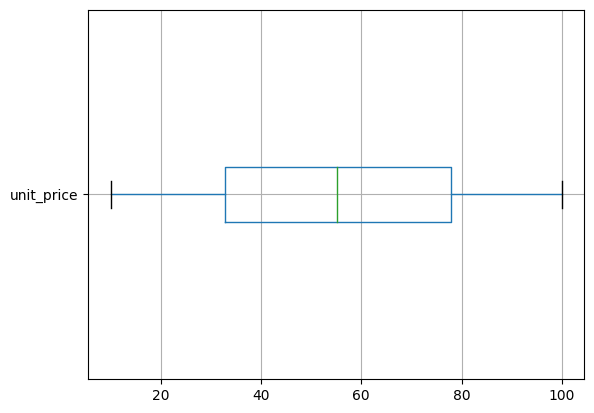

In [21]:
#Let's do a quick plot with matplotlib
df.boxplot(column='unit_price', vert=False, whis=3)


There are no outliers, the dataset is evenly distributed.

#### Quantity

In [22]:
# This column has the correct values as int64
quantity = df['quantity'].unique()
quantity.sort()
print(quantity)





[ 1  2  3  4  5  6  7  8  9 10]


#### Tax 5 %

In [23]:
# First check, datatype is correct 
# Let's rename the column for consistency tax_five_pct 
df.rename(columns={'tax_5%': 'tax_five_pct'}, inplace=True)

# Let's check the range of the tax
print(df['tax_five_pct'].min())
print(df['tax_five_pct'].max())


0.5085
49.65


In [24]:
# Remove the temporary column 'calculated_tax' and calculate the difference directly in the 'difference' column
df['difference'] = (df['unit_price'] * df['quantity'] * 0.05 - df['tax_five_pct']).round(10).abs()

#This part is tricky because the nature of the floating point numbers in computers
# so we have to round up in the 10th decimal and only absolutes values


#Check if the difference is different from 0
print(df[df['difference'] != 0])


Empty DataFrame
Columns: [invoice_id, branch, city, customer_type, gender, product_line, unit_price, quantity, tax_five_pct, total, date, time, payment, cogs, gross_margin_percentage, gross_income, rating, difference]
Index: []


#### Total 

In [26]:
#Range of the total 
print(df['total'].min())
print(df['total'].max())


10.6785
1042.65


In [25]:
# Remove the temporary column 'calculated_tax' and calculate the difference directly in the 'difference' column
df['difference_total'] = (((df['unit_price'] * df['quantity'] + df['tax_five_pct'])) - df['total']).round(10).abs()

#This part is tricky because the nature of the floating point numbers in computers
# so we have to round up in the 10th decimal and only absolutes values


#Check if the difference is different from 0
print(df[df['difference_total'] != 0])


Empty DataFrame
Columns: [invoice_id, branch, city, customer_type, gender, product_line, unit_price, quantity, tax_five_pct, total, date, time, payment, cogs, gross_margin_percentage, gross_income, rating, difference, difference_total]
Index: []


In [28]:
#to clean up the process let's remove those two extra columns
df.drop(columns=['difference', 'difference_total'], inplace=True)

#### Date 

In [32]:
#By experience, mostly in international db there sometimes are errors in the date format 
# Let's check if the date format is always dd/mm/yyyy
# A way to do this is that the first digits before the first / must be between 1 and 12 
#let's slice the string and check if it is true
print(df['date'].str.split('/').str[0].astype(int).between(1, 12).all())


True


In [33]:
#Let's transform the date column to datetime
df['date'] = pd.to_datetime(df['date'])

#This is very important in feature engineering and analysis
#Sometimes date and time are joined in the same value but this on is already separated

#### Time 

In [40]:
#We should make sure that all the values are in working hours of the supermarket

#Let's check the range of the hours 
#Get the digits before the : 

working_hours = df['time'].str.split(':').str[0].astype(int).unique()
working_hours.sort()
print(working_hours)



[10 11 12 13 14 15 16 17 18 19 20]


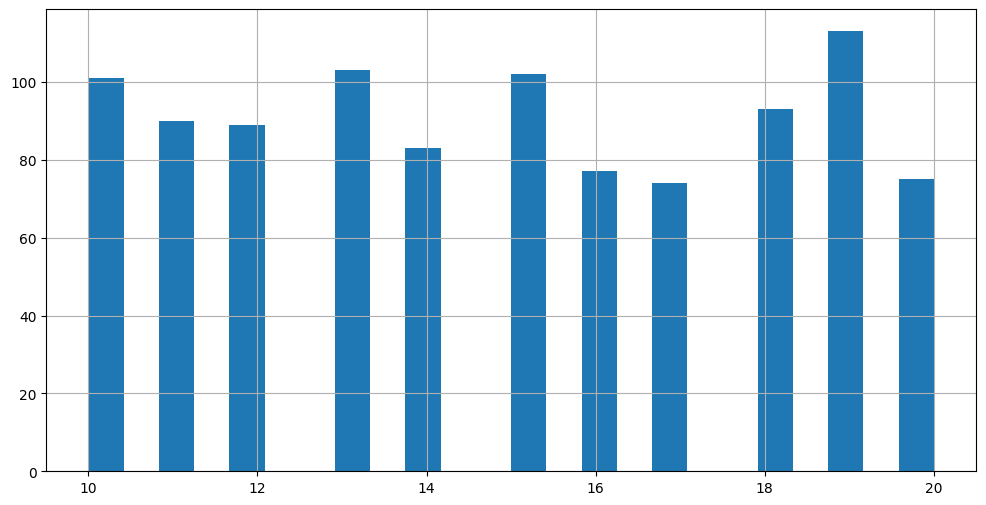

In [43]:
#Let's check the distribution of the hours
df['time'].str.split(':').str[0].astype(int).hist(bins=24, figsize=(12, 6))
plt.show()

##Note depending on the needs of the analysis we can create a datetime object 


#### Payment 

In [44]:
#Let's check the values of the payment method
print(df['payment'].unique())


['Ewallet' 'Cash' 'Credit card']


In [45]:
# The are no types let's count values
print(df['payment'].value_counts())


payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64


#### COGS 

In [64]:
# In the db cogs column is far from it's closest comparison  Unit price * quantity
# Let's move the column after quantity

# Get the index of the columns
cogs_index = df.columns.get_loc('cogs')
quantity_index = df.columns.get_loc('quantity')

# Construct the new order of the columns
new_order = list(df.columns)
new_order.insert(quantity_index + 1, new_order.pop(cogs_index))

# Reorder the columns
df = df[new_order]

#Verify the result
print(df.columns)



Index(['invoice_id', 'branch', 'city', 'customer_type', 'gender',
       'product_line', 'unit_price', 'quantity', 'cogs', 'tax_five_pct',
       'total', 'date', 'time', 'payment', 'gross_margin_percentage',
       'gross_income', 'rating'],
      dtype='object')


In [65]:
#Here we find something unusual that tells us this was dummy data
#The cogs column is the result of the multiplication of the unit price and the quantity and not the cost of inventory
#Let's make sure that the cogs column is the result of the multiplication of the unit price and the quantity
#Let's create a temporary column to check the result
df['temp_cogs'] = df['unit_price'] * df['quantity']
df['temp_cogs'] = df['temp_cogs'].round(10).abs()
#Let's check the result
print(df['temp_cogs'].equals(df['cogs']))
#Let's drop the temporary column
df.drop(columns='temp_cogs', inplace=True)


True


In [49]:
# Let's check the range of the coost of goods sold
print(df['cogs'].min())
print(df['cogs'].max())


10.17
993.0


#### Gross margin percentage

In [62]:
#Count the values of the gross margin percentage
print(df['gross_margin_percentage'].value_counts())

#Another hint this was dummy data is that the gross margin percentage is always 4.761905



gross_margin_percentage
4.761905    1000
Name: count, dtype: int64


#### Gross Income

In [66]:
# Let's check the range of the gross income
print(df['gross_income'].min())
print(df['gross_income'].max())


0.5085
49.65


#### Rating


In [67]:
# Let's check the range of the rating
print(df['rating'].min())
print(df['rating'].max())


4.0
10.0


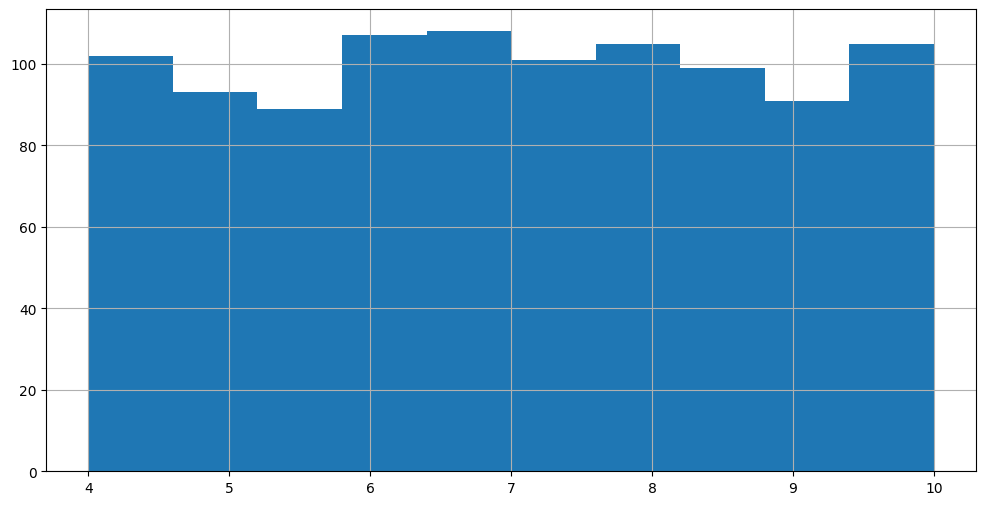

In [69]:
#let's check the distribution of the rating
df['rating'].hist(bins=10, figsize=(12, 6))
plt.show()


### Feature Engineering

At this point we could select the columns we want to keep and drop the rest. However, we can create some new features that could be useful for further analysis.

As example, we can create a new column with the day of the week of the purchase, or the month, week number, etc.

